## Following actions should be performed:

    # If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
    # Check for null and unique values for test and train sets.
    # Apply label encoder.
    # Perform dimensionality reduction.
    # Predict your test_df values using XGBoost.## 

In [1]:
import pandas as pd
import scipy as sp

In [2]:
df_train=pd.read_csv(r'C:\Users\mujee\Desktop\DATA SCIENCE\MACHINE LEARNING\Submission Project\train.csv')
df_test=pd.read_csv(r'C:\Users\mujee\Desktop\DATA SCIENCE\MACHINE LEARNING\Submission Project\test.csv')

In [3]:
df_train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


## 1) If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [4]:
train_var=df_train.drop(columns={'ID','y'}).var().to_dict()

In [5]:
no_var_train=[]
for key, value in train_var.items():
    if value==0:
        no_var_train.append(key)
print(no_var_train)
        

['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [6]:
df_new_train=df_train.drop(columns={'X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'})

In [7]:
df_new_train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


## 2) Check for null and unique values for test and train sets.

In [8]:
df_train.isnull().values.any()

False

In [9]:
df_test.isnull().values.any()

False

In [10]:
df_train.nunique().sum().any()

True

In [11]:
df_test.nunique().sum().any()

True

## 3) Apply label encoder.

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
df_train_features=df_new_train.drop(columns={'ID','y'})
df_train_target=df_new_train.y

In [14]:
labeling_columns=[]
for i in df_train_features.columns:
    if df_train_features[i].dtype=='object':
        labeling_columns.append(i)
print(labeling_columns)

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [15]:
labeling_data=df_train_features[["X0", 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']]

In [16]:
labeling_data.all()

X0    True
X1    True
X2    True
X3    True
X4    True
X5    True
X6    True
X8    True
dtype: bool

In [17]:
print(df_train_features.shape)
print(df_train_target.shape)

(4209, 364)
(4209,)


In [18]:
labeling_data.describe()

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [19]:
le=LabelEncoder()

In [20]:
df_train_features['X0'] = le.fit_transform(df_train_features.X0)
df_train_features['X1'] = le.fit_transform(df_train_features.X1)
df_train_features['X2'] = le.fit_transform(df_train_features.X2)
df_train_features['X3'] = le.fit_transform(df_train_features.X3)
df_train_features['X4'] = le.fit_transform(df_train_features.X4)
df_train_features['X5'] = le.fit_transform(df_train_features.X5)
df_train_features['X6'] = le.fit_transform(df_train_features.X6)
df_train_features['X8'] = le.fit_transform(df_train_features.X8)

In [21]:
df_train_features['X0'].describe

<bound method NDFrame.describe of 0       32
1       32
2       20
3       20
4       20
        ..
4204     8
4205    31
4206     8
4207     9
4208    46
Name: X0, Length: 4209, dtype: int32>

## 4) Perform dimensionality reduction. 

In [22]:
print(df_train_features.shape)
print(df_train_target.shape)

(4209, 364)
(4209,)


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

In [24]:
pca.fit(df_train_features,df_train_target)

PCA(n_components=0.95)

In [25]:
train_data_feature_trans = pca.fit_transform(df_train_features)
print(train_data_feature_trans.shape)

(4209, 6)


## 5) Predict your test_df values using XGBoost

In [26]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [28]:
train_x,test_x,train_y,test_y = train_test_split(train_data_feature_trans,df_train_target,test_size=.3,random_state=7)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2946, 6)
(2946,)
(1263, 6)
(1263,)


In [29]:
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.4, max_depth = 10, alpha = 6, 
                           n_estimators = 20)
model = xgb_reg.fit(train_x,train_y)
print('RMSE = ',sqrt(mean_squared_error(model.predict(test_x),test_y)))

[22:05:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
RMSE =  12.288794806074309


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

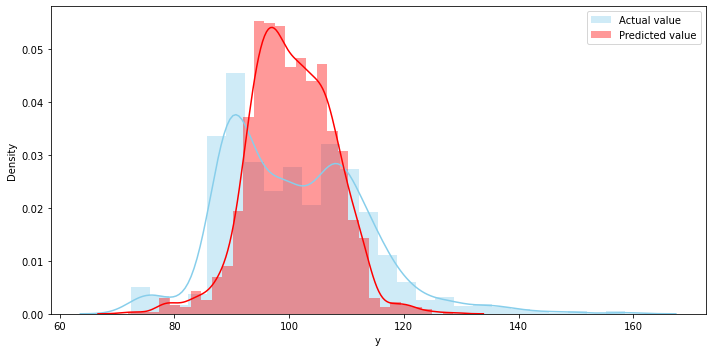

In [31]:
pred_test_y = model.predict(test_x)

plt.figure(figsize=(10,5))

sns.distplot(test_y[test_y<160], color="skyblue", label="Actual value")
sns.distplot(pred_test_y[pred_test_y<160] , color="red", label="Predicted value")
plt.legend()

plt.tight_layout()

In [32]:
dmatrix_train = xgb.DMatrix(data=train_data_feature_trans,label=df_train_target)

params = {'objective':'reg:linear', 'colsample_bytree': 0.3, 'learning_rate': 0.3, 'max_depth': 5, 'alpha': 10}

model_cv = xgb.cv(dtrain=dmatrix_train, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, 
                      metrics="rmse", as_pandas=True, seed=7)
model_cv.tail(4)

[22:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
31,8.935207,0.183408,11.060048,0.736219
32,8.880285,0.174860,11.044371,0.740167
33,8.849045,0.185328,11.049080,0.738352
34,8.792400,0.202135,11.043289,0.728256


In [33]:
test_data = df_test.drop(columns={'X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'})
df_test.shape

(4209, 377)

In [34]:
test_data.isnull().sum().any()

False

In [35]:
test_data_feature = df_test.drop(columns={'ID'})
print(test_data_feature.shape)

(4209, 376)


In [36]:
test_data_feature.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


In [37]:
test_data_feature['X0'] = le.fit_transform(test_data_feature.X0)
test_data_feature['X1'] = le.fit_transform(test_data_feature.X1)
test_data_feature['X2'] = le.fit_transform(test_data_feature.X2)
test_data_feature['X3'] = le.fit_transform(test_data_feature.X3)
test_data_feature['X4'] = le.fit_transform(test_data_feature.X4)
test_data_feature['X5'] = le.fit_transform(test_data_feature.X5)
test_data_feature['X6'] = le.fit_transform(test_data_feature.X6)
test_data_feature['X8'] = le.fit_transform(test_data_feature.X8)

In [38]:
pca.fit(test_data_feature)

PCA(n_components=0.95)

In [39]:
test_data_feature_trans = pca.fit_transform(test_data_feature)
print(test_data_feature_trans.shape)

(4209, 6)


In [40]:
test_pred = model.predict(test_data_feature_trans)
test_pred

array([ 86.12015 ,  92.929794,  98.74635 , ...,  92.836525, 118.76457 ,
        98.46741 ], dtype=float32)

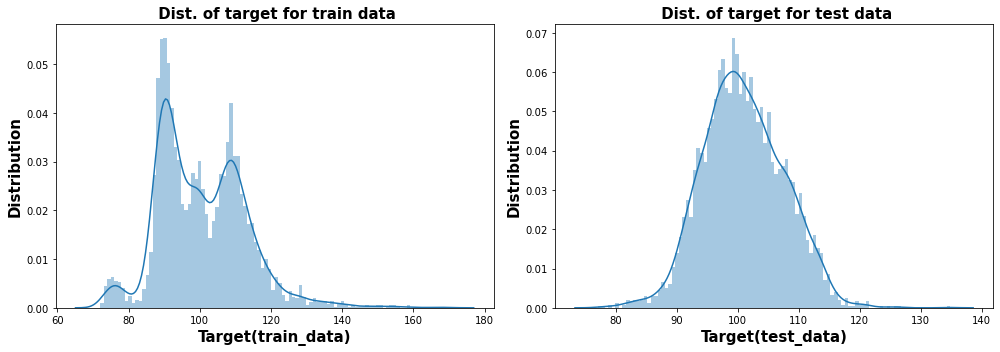

In [41]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

train_plot = sns.distplot(df_train_target[df_train_target<200], bins=100, kde=True, ax=ax[0])
train_plot.set_xlabel('Target(train_data)', weight='bold', size=15)
train_plot.set_ylabel('Distribution', weight='bold', size=15)
train_plot.set_title(' Dist. of target for train data', weight='bold', size=15)

test_plot = sns.distplot(test_pred[test_pred<200], bins=100, kde=True, ax=ax[1])
test_plot.set_xlabel('Target(test_data)', weight='bold', size=15)
test_plot.set_ylabel('Distribution', weight='bold', size=15)
test_plot.set_title(' Dist. of target for test data', weight='bold', size=15)

plt.tight_layout()